Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import numpy as np
import datetime
import pandas as pd
import sklearn as sk
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

Import cleaned data

In [48]:
data = pd.read_csv('/Users/alijanehsan/Downloads/Final_project/merge.csv', parse_dates=['date'], index_col =0)


Check data

In [49]:
data.head(5)

,date,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,site,Revenue,country,...,gender,age,color,size,kids,men,unisex,women,day,month
0,2022-01-14,ZB00245086,1,107.443868,63.815891,126.367186,E-COMMER,top4running.at,107.443868,Austria,...,men,adults,White,44,0,1,0,0,Friday,January
1,2021-12-09,ZB00245086,1,98.582325,63.816279,129.458420,E-COMMER,top4running.it,98.582325,Italy,...,men,adults,White,44,0,1,0,0,Thursday,December
2,2021-12-08,ZB00245086,1,100.182074,63.815891,131.559296,E-COMMER,top4running.at,100.182074,Austria,...,men,adults,White,44,0,1,0,0,Wednesday,December
3,2021-12-04,ZB00245086,1,98.350139,63.816279,129.153514,E-COMMER,top4running.it,98.350139,Italy,...,men,adults,White,44,0,1,0,0,Saturday,December
4,2021-11-14,ZB00245086,1,99.296899,63.815891,130.396884,E-COMMER,top4running.at,99.296899,Austria,...,men,adults,White,44,0,1,0,0,Sunday,November


In [50]:
data.shape

(1911344, 26)

In [51]:
data['country'].value_counts()

Czech Republic    650064
Slovakia          328889
Hungary           270961
Romania           256946
Germany            96276
Spain              95304
France             59791
Italy              34672
Croatia            33770
com                25582
Ireland            13666
Denmark            10788
Netherland          8688
Austria             7799
Sweden              5369
Portugal            4132
Poland              3976
Belgium             2742
Finland             1225
Slovenia             618
other                 71
United Kingdom        10
Bulgaria               5
Name: country, dtype: int64

Filter the data for Czeck Republic

In [52]:
df_cz = data[data['country']== 'Czech Republic']

df_cz

,date,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,site,Revenue,country,...,gender,age,color,size,kids,men,unisex,women,day,month
7,2022-01-14,S101,1,2.850775,0.000000,2.868217,E-COMMER,11teamsports.cz,2.850775,Czech Republic,...,men,adults,Black,M,0,1,0,0,Friday,January
10,2022-01-14,S101,1,1.889922,0.000000,1.899225,E-COMMER,11teamsports.cz,1.889922,Czech Republic,...,men,adults,Black,M,0,1,0,0,Friday,January
14,2022-01-14,S101,1,1.889922,0.000000,1.899225,E-COMMER,11teamsports.cz,1.889922,Czech Republic,...,men,adults,Black,M,0,1,0,0,Friday,January
16,2022-01-14,S101,1,1.889922,0.000000,1.899225,E-COMMER,top4running.cz,1.889922,Czech Republic,...,men,adults,Black,M,0,1,0,0,Friday,January
25,2022-01-14,S101,1,1.889922,0.000000,1.899225,E-COMMER,top4fitness.cz,1.889922,Czech Republic,...,men,adults,Black,M,0,1,0,0,Friday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128516,2019-06-01,ZB00021748,1,74.828682,48.626357,96.066279,E-COMMER,top4running.cz,74.828682,Czech Republic,...,women,adults,Silver,39,0,0,0,1,Saturday,June
2128518,2019-06-01,ZB00009785,1,63.232558,1.000775,105.387984,E-COMMER,top4running.cz,63.232558,Czech Republic,...,men,adults,Black,"40,5",0,1,0,0,Saturday,June
2128520,2019-06-01,ZB00000151,1,25.305814,9.053101,0.930233,E-COMMER,top4running.cz,25.305814,Czech Republic,...,women,adults,Black,S,0,0,0,1,Saturday,June
2128521,2019-06-01,ZB00025745,1,45.646899,24.039922,60.830233,E-COMMER,11teamsports.cz,45.646899,Czech Republic,...,men,adults,Silver,45,0,1,0,0,Saturday,June


Write a function to get weekly data

In [53]:


def weekly_data(df_cz, time_period='week', Revenue='net'):
    time_periods = {
        'day': 'D',
        'week': 'W',
        'month': 'M'}
    
    revenue_cat = {
        'net':'Revenue'}
    df_cz['date'] = pd.to_datetime(df_cz['date'])
    df_cz = df_cz.set_index('date')
    df_cz = df_cz[revenue_cat[Revenue]].resample(time_periods[time_period]).sum()
    df_cz = pd.DataFrame(df_cz).reset_index()
    return df_cz

In [54]:
df_w = weekly_data(df_cz)
#df_w.columns=['ds', 'y']
df_w.ds=pd.to_datetime(df_w['date'])
df_w.sort_values('date')
df_w.head()

<ipython-input-53-d47523a17911>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-aa918ba341b7>:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,date,Revenue
0,2019-06-02,1263.118988
1,2019-06-09,53144.983937
2,2019-06-16,40175.268093
3,2019-06-23,57770.308586
4,2019-06-30,36489.526615


Check whether the data is stationary or not

In [55]:
# Check the data to see whether it is stationary or not
plot_data = [
    go.Scatter(
        x=df_w['date'],
        y=df_w['Revenue'],
    )
]
plot_layout = go.Layout(
        title='weekly Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

 Check the data with Dicky-Fuller test as well

In [56]:

from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df_w['Revenue'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                  -4.386625
p-value                          0.000313
#lags used                       1.000000
number of observations used    136.000000
critical value (1%)             -3.479372
critical value (5%)             -2.883037
critical value (10%)            -2.578234
dtype: float64


In [57]:

df_w.columns = ['ds','y']

In [58]:
len(df_w)

138

In [59]:

train=df_w[:100]
test= df_w[100:]

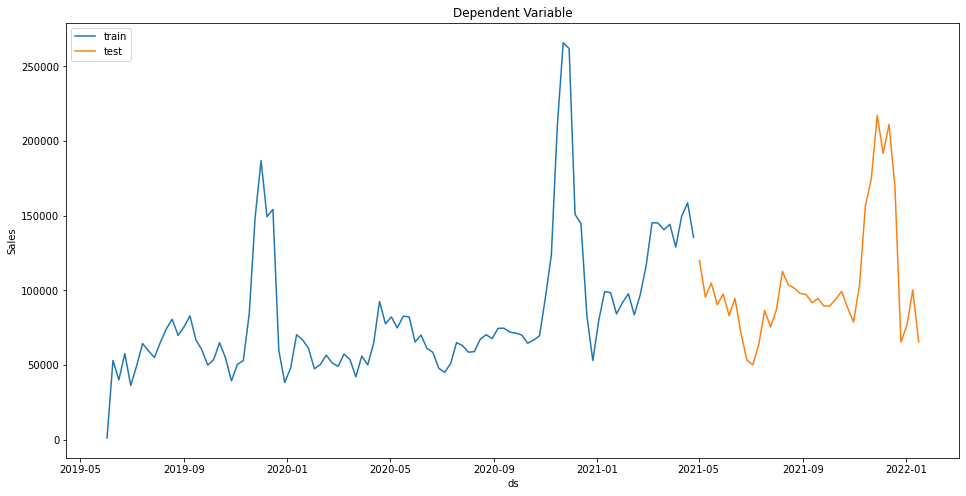

In [60]:
# Plot the test and train data
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x='ds', y='y', label='train', data=train, ax=ax)
sns.lineplot(x='ds', y='y', label='test', data=test, ax=ax)
plt.ticklabel_format(style='plain', axis='y')
ax.legend(loc='upper left')
ax.set(title='Dependent Variable', ylabel='Sales');
plt.ticklabel_format(style='plain', axis='y')



Train the model

In [61]:
m = Prophet(weekly_seasonality=True,yearly_seasonality=True)
m.add_seasonality(name='weekly', period=len(train), fourier_order=2)
#m.add_country_holidays(country_name='UK')
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Predict weekly sales for Czech Republic

In [62]:
future = m.make_future_dataframe(periods= len(test)+3, freq = 'W')
forecast = m.predict(future)
forecast

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-02,16219.419495,25350.393582,69047.771814,16219.419495,16219.419495,31306.176751,31306.176751,31306.176751,44903.157925,44903.157925,44903.157925,-13596.981173,-13596.981173,-13596.981173,0.0,0.0,0.0,47525.596246
1,2019-06-09,16451.940012,21123.866491,66507.244123,16451.940012,16451.940012,27724.944510,27724.944510,27724.944510,44903.157925,44903.157925,44903.157925,-17178.213415,-17178.213415,-17178.213415,0.0,0.0,0.0,44176.884523
2,2019-06-16,16684.460529,20850.581608,66112.729652,16684.460529,16684.460529,26355.793803,26355.793803,26355.793803,44903.157925,44903.157925,44903.157925,-18547.364122,-18547.364122,-18547.364122,0.0,0.0,0.0,43040.254332
3,2019-06-23,16916.981047,20587.914320,65912.201158,16916.981047,16916.981047,26498.430196,26498.430196,26498.430196,44903.157925,44903.157925,44903.157925,-18404.727728,-18404.727728,-18404.727728,0.0,0.0,0.0,43415.411243
4,2019-06-30,17149.501591,21341.136020,66113.714135,17149.501591,17149.501591,26762.824161,26762.824161,26762.824161,44903.157925,44903.157925,44903.157925,-18140.333764,-18140.333764,-18140.333764,0.0,0.0,0.0,43912.325751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2022-01-09,142775.440438,147547.358391,195592.278293,137862.661273,148569.602851,28057.784124,28057.784124,28057.784124,44903.157925,44903.157925,44903.157925,-16845.373801,-16845.373801,-16845.373801,0.0,0.0,0.0,170833.224562
137,2022-01-16,144234.198910,160754.349387,204713.795243,139159.963232,150290.001903,37098.106811,37098.106811,37098.106811,44903.157925,44903.157925,44903.157925,-7805.051114,-7805.051114,-7805.051114,0.0,0.0,0.0,181332.305721
138,2022-01-23,145692.957382,158444.240585,205378.135440,140466.889521,152031.810407,34781.969833,34781.969833,34781.969833,44903.157925,44903.157925,44903.157925,-10121.188091,-10121.188091,-10121.188091,0.0,0.0,0.0,180474.927215
139,2022-01-30,147151.715853,149965.530851,196057.336194,141702.716473,153760.904791,25703.640471,25703.640471,25703.640471,44903.157925,44903.157925,44903.157925,-19199.517454,-19199.517454,-19199.517454,0.0,0.0,0.0,172855.356324


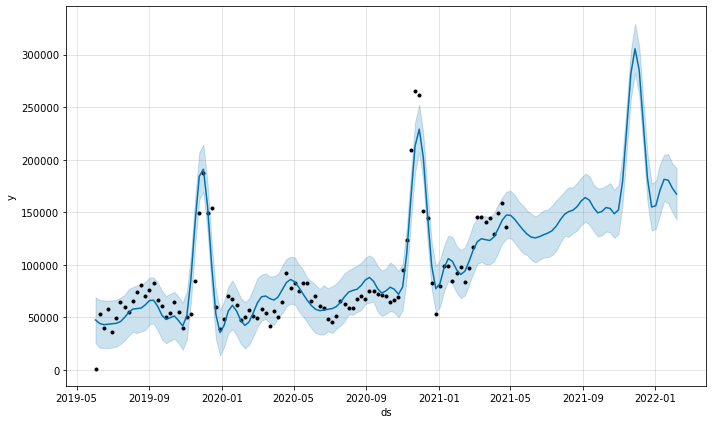

In [63]:
#plot the forcaste
fig1 = m.plot(forecast)


/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



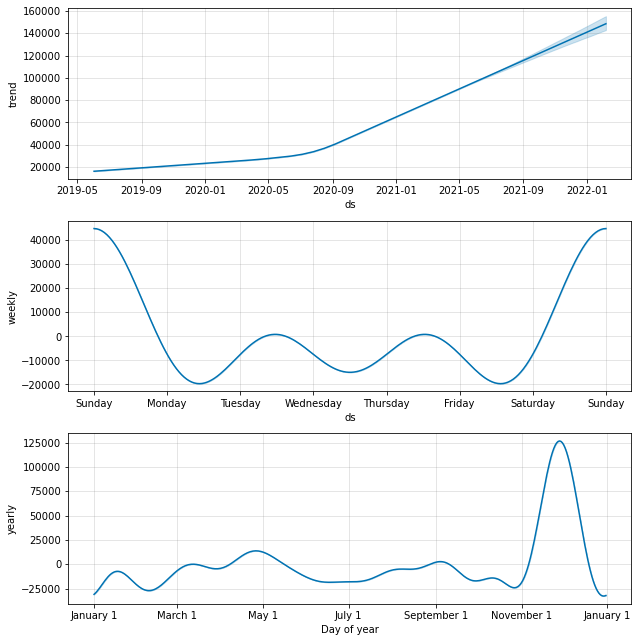

In [64]:
# plot the component
m.plot_components(forecast)
plt.show()

Now, predict with unseen data (test data)

In [65]:
test_forecast=m.predict(test)
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
31,2021-12-05,285255.619754,263724.155543,307464.784856
32,2021-12-12,233965.904112,212168.414570,256427.068844
33,2021-12-19,182179.836504,160385.137108,204799.878230
34,2021-12-26,155014.132202,134359.626340,178960.585439
35,2022-01-02,156178.356524,133797.990904,178927.088799
36,2022-01-09,170833.224562,147538.369500,194608.860131
37,2022-01-16,181332.305721,158857.184173,203631.337117


Plot the forecast vs actual values

Text(0.5, 1.0, 'Forecast VS Actual')

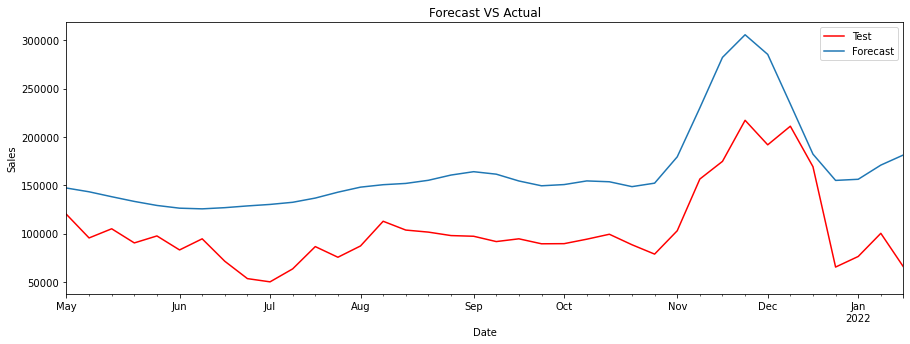

In [66]:
# Plot the forecast VS the actuals
f, ax = plt.subplots(figsize=(14, 5))
f.set_figheight(5)
f.set_figwidth(15)
test.plot(x='ds', y='y', color='r', label='Test', ax=ax)
test_forecast.plot(x='ds', y='yhat', label='Forecast', ax=ax)
plt.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.title('Forecast VS Actual')

 Evaluate the model performance

In [67]:
df_merge = pd.merge(test, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-05-02,125532.934929,170426.590188,147137.869138,119922.343480
1,2021-05-09,121020.287576,166486.266272,143249.738890,95552.112528
2,2021-05-16,115870.265425,160387.389390,138159.999146,105017.167924
3,2021-05-23,110937.686705,156398.604221,133294.946399,90407.080757
4,2021-05-30,109136.561622,151653.943726,129131.224651,97621.074155


In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)

print('MAE:', mae_01, 'MAPE:',mape_01)

MAE: 60846.792183109166 MAPE: 0.6758133340323824


Hyper parameter tuning

In [69]:
# Let's tun the hpyer parameter
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],   
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = []  # Store the MAE for each params here
mapes = [] # Store the MAPE for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_w)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
tuning_results['mape'] = mapes

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:fbprophet:Making 85 forecasts with cutoffs between 2020-06-06 23:59:59.999999970 and 2022-01-15 23:59:59.999999970
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fc0b7952490>
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed 

Find the best  parameters and compare the results

In [ ]:
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0}


Train the model with best parameters

In [ ]:

m_01 = Prophet(weekly_seasonality=True,yearly_seasonality=True,
changepoint_prior_scale = best_params['changepoint_prior_scale'],
seasonality_prior_scale = best_params['seasonality_prior_scale'] )
m_01.add_seasonality(name='weekly', period=len(train), fourier_order=2)
#m.add_country_holidays(country_name='UK')
model = m_01.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
future_01 = model.make_future_dataframe(periods=len(test)+3, freq = 'W')
forecast_01 = model.predict(future_01)

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Check the model peformance after tunning the parameters

In [ ]:
df_merge_1 = pd.merge(test, forecast_01[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge_1 = df_merge_1[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge_1.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-05-02,138870.158596,183029.854477,161077.518425,119922.343480
1,2021-05-09,139195.945828,181475.984001,160828.242454,95552.112528
2,2021-05-16,136582.365178,180383.803604,158000.892542,105017.167924
3,2021-05-23,131243.484206,175753.759135,154004.490497,90407.080757
4,2021-05-30,126412.291450,172627.828239,150163.909103,97621.074155


Check model performance after tuning parameters

In [ ]:
y_true_01 = df_merge_1['y'].values
y_pred_01= df_merge_1['yhat'].values
#mae_02 = mean_absolute_error(y_true_01, y_pred_01)
mape_02 = mean_absolute_percentage_error(y_true_01, y_pred_01)

print('mape after tuning prarameters:',mape_02)

mape after tuning prarameters: 0.9637129814950498


It seems that parmeter tuning doesn't improved  model performance